In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

C:\Users\ASUS\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sales_data = pd.read_csv("RSCCASN.csv",  parse_dates=True, index_col='DATE')

In [3]:
type(sales_data)

pandas.core.frame.DataFrame

In [4]:
sales_data.columns

Index(['RSCCASN'], dtype='object')

In [5]:
sales_data.sum().isnull()

RSCCASN    False
dtype: bool

In [6]:
sales_data.columns = ['Sales']

In [7]:
sales_data

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [8]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB
None


In [9]:
print(sales_data.describe())

              Sales
count    334.000000
mean   16325.095808
std     5369.839014
min     6938.000000
25%    12298.500000
50%    15878.500000
75%    19772.500000
max    34706.000000


In [10]:
sales_data.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [11]:
sales_data.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


<Axes: xlabel='DATE'>

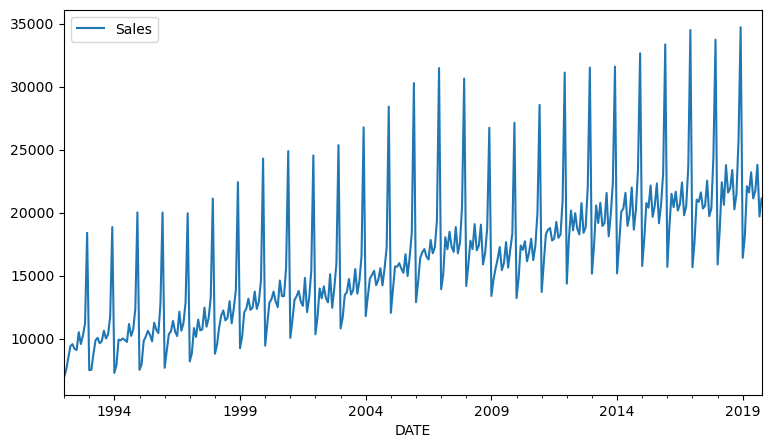

In [12]:
sales_data.plot(figsize=(9, 5))

In [13]:
len(sales_data) - 18

316

**Data Splitting**

In [14]:
test_size = 18
test_index = len(sales_data) - test_size

In [15]:
test_index

316

In [16]:
train = sales_data.iloc[:test_index]
test = sales_data.iloc[test_index:]

**Scaling the data**

In [17]:
# scaling the data

scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler()

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
scaled_train[:5]

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053]])

In [21]:
scaled_test[:5]


array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ]])

In [22]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [23]:
length=12

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [24]:
generator

In [25]:
X, y = generator[0]
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [26]:
y

array([[0.02047633]])

In [27]:
len(X[0])

12

In [28]:
n_features = 1

**Creating the SimpleRNN Model**

In [29]:
from keras.layers import RNN, SimpleRNN, Dense, Dropout

In [30]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# MODELLING USING MULTIPLE RNN LAYER
model = Sequential()

model.add(SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(length, n_features)))


model.add(SimpleRNN(50, activation='relu', return_sequences=False))


model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mse')


In [62]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 12, 100)           10200     
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 50)                7550      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 18271 (71.37 KB)
Trainable params: 18271 (71.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [226]:
model1 = Sequential()
model1.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mse')

In [227]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [212]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [33]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=32)

**Training the Model**

In [34]:
model.fit(generator, epochs=20, 
          validation_data=validation_generator,
          callbacks=[early_stop])


Epoch 1/20
304/304 [==============================] - 3s 5ms/step - loss: 0.0209 - val_loss: 0.0054
Epoch 2/20
304/304 [==============================] - 1s 4ms/step - loss: 0.0057 - val_loss: 0.0034
Epoch 3/20
304/304 [==============================] - 1s 4ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 4/20
304/304 [==============================] - 1s 4ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 5/20
304/304 [==============================] - 1s 4ms/step - loss: 0.0013 - val_loss: 4.4500e-04
Epoch 6/20
304/304 [==============================] - 1s 4ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 7/20
304/304 [==============================] - 1s 4ms/step - loss: 0.0015 - val_loss: 0.0017


In [228]:
model1.fit(generator, epochs=20, 
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 4s 8ms/step - loss: 0.0267 - val_loss: 0.0069
Epoch 2/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0181 - val_loss: 0.0085
Epoch 3/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0135 - val_loss: 0.0018
Epoch 4/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0077 - val_loss: 0.0010
Epoch 5/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 6/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0019 - val_loss: 0.0055


In [35]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.020850,0.005429
1,0.005674,0.003382
2,0.003426,0.001260
3,0.001565,0.003963
4,0.001275,0.000445
5,0.001612,0.004506
6,0.001525,0.001668


**Predicting for Test Data**

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    test_predictions.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 29ms/step


In [ ]:
test_predictions1 = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model1.predict(current_batch)[0]
    
    # store prediction 
    test_predictions.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [37]:
true_prediction = scaler.inverse_transform(test_predictions)


In [38]:
test['Predictions'] = true_prediction


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25560\2149720079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_prediction


In [39]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22105.011678
2018-06-01,21589,21193.746662
2018-07-01,21919,22021.313604
2018-08-01,23381,23396.739200
2018-09-01,20260,21712.291863
2018-10-01,21473,22462.355056
2018-11-01,25831,25595.474680
2018-12-01,34706,32542.772712
2019-01-01,16410,18942.720613


In [70]:
# tested test dataset by using multiple RNN layers
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22076.425521
2018-06-01,21589,19723.134023
2018-07-01,21919,18903.019806
2018-08-01,23381,23433.773804
2018-09-01,20260,18288.204006
2018-10-01,21473,17570.006367
2018-11-01,25831,19443.831247
2018-12-01,34706,35521.835410
2019-01-01,16410,9584.368765


In [179]:
test1

,Sales,Predictions
DATE,,
2018-05-01,23764,22477.056930
2018-06-01,21589,21200.472913
2018-07-01,21919,21492.576416
2018-08-01,23381,23635.379104
2018-09-01,20260,20870.277518
2018-10-01,21473,21627.538144
2018-11-01,25831,26256.661718
2018-12-01,34706,37844.311255
2019-01-01,16410,16545.264389


**Plot of Actuals and Predictions for Test Data**

<Axes: xlabel='DATE'>

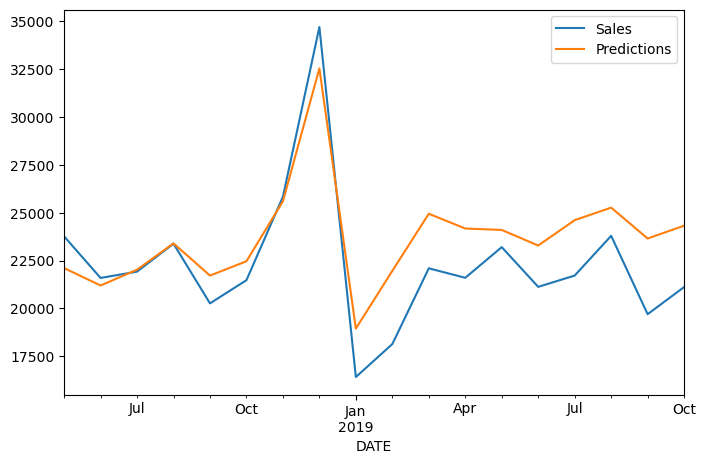

In [40]:
# tested by using single layer rnn
test.plot(figsize=(8,5))

<Axes: xlabel='DATE'>

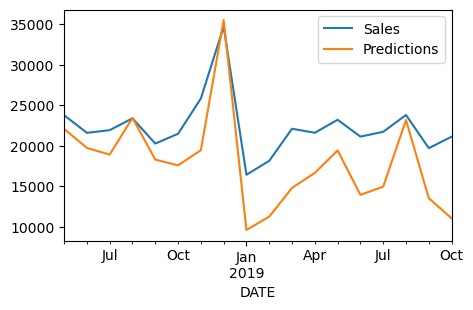

In [71]:
# tested by using multiple RNN layers
test.plot(figsize=(5,3))

<Axes: xlabel='DATE'>

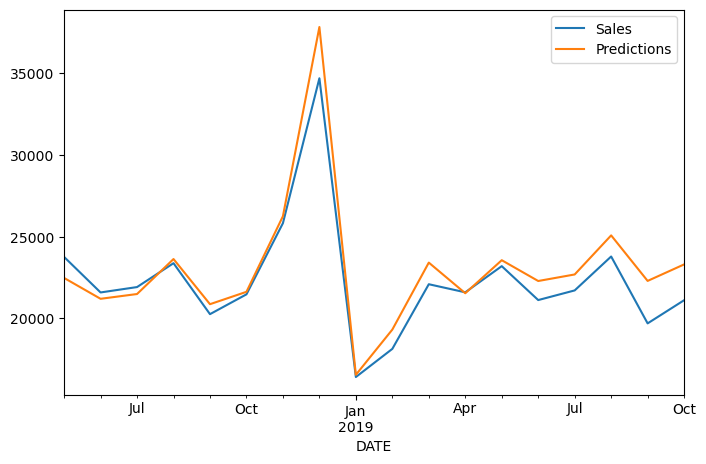

In [180]:
# tested by using lstm
test.plot(figsize=(8, 5))

**Calculating the Correctness for Test Data**

In [41]:
# # calculating mean average ratio by using single RNN layer
mean = test['Sales'].mean()
mae = (test['Sales'] - test['Predictions']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  22321.833333333332
mae: 1855.24545837773
mae/mean ratio:  8.311348941071433 %
correctness:  91.68865105892857 %


In [72]:
# calculating mean average ratio by using multiple RNN layer

mean = test['Sales'].mean()
mae = (test['Sales'] - test['Predictions']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  22321.833333333332
mae: 4461.713247375357
mae/mean ratio:  19.988112897127735 %
correctness:  80.01188710287227 %


In [230]:
# calculating mean average ratio by using LSTM layer
mean = test['Sales'].mean()
mae = (test['Sales'] - test['Predictions']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  22321.833333333332
mae: 3868.1080580552452
mae/mean ratio:  17.328809871001837 %
correctness:  82.67119012899816 %


In [42]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(sales_data)
scaled_full_data

array([[0.        ],
       [0.02110343],
       [0.05535148],
       [0.08869922],
       [0.09435321],
       [0.08081245],
       [0.07796744],
       [0.12874532],
       [0.0948934 ],
       [0.11941804],
       [0.15301786],
       [0.41259723],
       [0.02031115],
       [0.02110343],
       [0.06583117],
       [0.10548113],
       [0.11253961],
       [0.09712619],
       [0.1028522 ],
       [0.13288678],
       [0.11073898],
       [0.1227312 ],
       [0.17365313],
       [0.42901901],
       [0.01231634],
       [0.03471622],
       [0.10742581],
       [0.10555315],
       [0.11059493],
       [0.10641746],
       [0.10072746],
       [0.15193748],
       [0.11808557],
       [0.13656007],
       [0.19504466],
       [0.47097378],
       [0.02088735],
       [0.03684097],
       [0.10360847],
       [0.11632094],
       [0.13259867],
       [0.12111063],
       [0.10249208],
       [0.15579084],
       [0.13583982],
       [0.12608038],
       [0.20934169],
       [0.470

In [43]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                                length=length, batch_size=1)

In [44]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(generator, epochs=8)

Epoch 1/8
322/322 [==============================] - 3s 4ms/step - loss: 0.0210
Epoch 2/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 3/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 4/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 5/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 6/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 7/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0070
Epoch 8/8
322/322 [==============================] - 1s 4ms/step - loss: 0.0018


In [45]:
forecast = []
# Replace periods with whatever forecast lengt you want 
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 28ms/step


In [46]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[25143.5911088 ],
       [35060.29998875],
       [15268.43903422],
       [17997.64292765],
       [21150.47176456],
       [21052.46255302],
       [22085.64230728],
       [19879.75864649],
       [20320.69584727],
       [23700.41047621],
       [18743.96703362],
       [20051.52267098]])

In [47]:
sales_data

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [48]:
forecast


array([[25143.5911088 ],
       [35060.29998875],
       [15268.43903422],
       [17997.64292765],
       [21150.47176456],
       [21052.46255302],
       [22085.64230728],
       [19879.75864649],
       [20320.69584727],
       [23700.41047621],
       [18743.96703362],
       [20051.52267098]])

In [49]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods,freq='MS')

In [50]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [51]:
forecast_data = pd.DataFrame(data=forecast, index=forecast_index, 
                             columns=['Forecast'])

In [52]:
forecast_data

,Forecast
2019-11-01,25143.591109
2019-12-01,35060.299989
2020-01-01,15268.439034
2020-02-01,17997.642928
2020-03-01,21150.471765
2020-04-01,21052.462553
2020-05-01,22085.642307
2020-06-01,19879.758646
2020-07-01,20320.695847
2020-08-01,23700.410476


<Axes: >

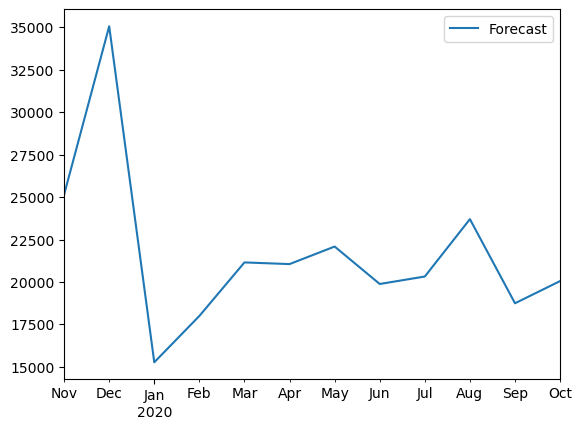

In [55]:
forecast_data.plot()

<Axes: xlabel='DATE'>

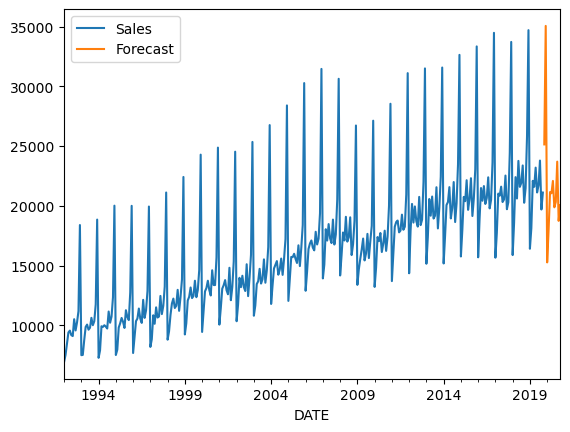

In [53]:
ax = sales_data.plot()
forecast_data.plot(ax=ax)

(576.0, 611.0)

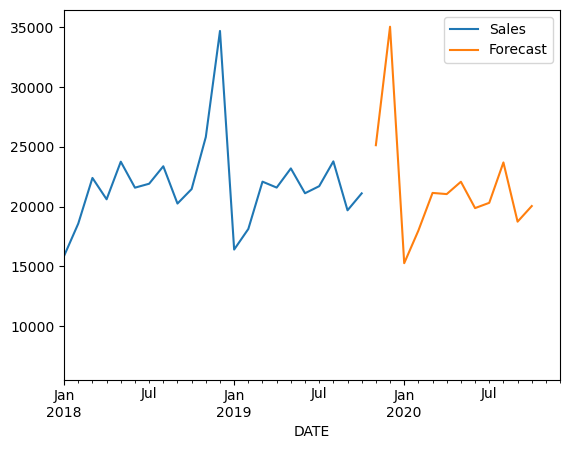

In [54]:
ax = sales_data.plot()
forecast_data.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')